In [1]:
# import modules
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load dataset
df = pd.read_csv("winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
X=df.drop('quality',axis=1)
y=df['quality']

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Upsampling the values
over = SMOTE()
ox, oy = over.fit_resample(X, y)

In [7]:
# Creating new resampled dataframe.
new_X = pd.DataFrame(ox)
new_y = pd.Series(oy)

new_df = pd.concat([new_X, new_y], axis=1)
new_df.columns = df.columns
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4086 entries, 0 to 4085
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4086 non-null   float64
 1   volatile acidity      4086 non-null   float64
 2   citric acid           4086 non-null   float64
 3   residual sugar        4086 non-null   float64
 4   chlorides             4086 non-null   float64
 5   free sulfur dioxide   4086 non-null   float64
 6   total sulfur dioxide  4086 non-null   float64
 7   density               4086 non-null   float64
 8   pH                    4086 non-null   float64
 9   sulphates             4086 non-null   float64
 10  alcohol               4086 non-null   float64
 11  quality               4086 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 383.2 KB


In [9]:
# Split data into train test
X = new_df.drop(columns='quality',axis=1)
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
y_train.value_counts()

5    545
3    545
8    545
4    545
7    544
6    544
Name: quality, dtype: int64

In [11]:
y_test.value_counts()

7    137
6    137
8    136
5    136
4    136
3    136
Name: quality, dtype: int64

In [12]:
standard=StandardScaler()
X_train[X_train.columns]=standard.fit_transform(X_train[X_train.columns])
X_test[X_test.columns]=standard.fit_transform(X_test[X_test.columns])

In [13]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03,3.268000e+03
mean,-4.144651e-16,-3.369228e-16,-8.211166e-17,5.418622e-17,1.940342e-16,1.015100e-16,7.158017e-17,-4.530709e-14,-2.982790e-15,4.752420e-16,-2.223249e-15
std,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00,1.000153e+00
min,-2.272741e+00,-1.906074e+00,-1.348243e+00,-1.357541e+00,-1.713968e+00,-1.276222e+00,-1.059787e+00,-3.412020e+00,-3.656064e+00,-2.102746e+00,-1.935745e+00
25%,-7.091885e-01,-8.049561e-01,-9.805708e-01,-5.197716e-01,-4.286876e-01,-7.724695e-01,-7.387014e-01,-5.900411e-01,-6.999464e-01,-6.998130e-01,-8.125815e-01
50%,-2.280955e-01,-1.524419e-01,-2.009039e-02,-3.118700e-01,-2.302872e-01,-3.065151e-01,-3.331196e-01,1.253734e-02,-5.685132e-02,-1.896555e-01,-1.570203e-01
75%,6.450355e-01,5.408544e-01,8.236507e-01,1.278220e-01,6.462963e-02,4.246257e-01,3.889130e-01,6.060798e-01,6.582730e-01,5.340894e-01,6.464247e-01
max,4.522698e+00,4.048118e+00,3.473393e+00,1.038615e+01,1.161481e+01,6.085664e+00,8.701689e+00,3.778114e+00,4.402999e+00,8.385092e+00,3.522562e+00


In [14]:
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02,8.180000e+02
mean,5.192804e-16,-2.267949e-16,-1.243233e-16,4.365565e-16,-5.598619e-17,-9.093514e-17,1.769842e-16,-3.573289e-14,-9.113872e-16,-3.978073e-16,-4.047292e-16
std,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00,1.000612e+00
min,-2.231371e+00,-1.889216e+00,-1.399414e+00,-1.395048e+00,-1.605069e+00,-1.036818e+00,-1.083765e+00,-3.254561e+00,-3.740794e+00,-2.009679e+00,-2.043605e+00
25%,-7.400265e-01,-7.928090e-01,-9.979302e-01,-5.979098e-01,-4.139788e-01,-7.466022e-01,-7.712461e-01,-6.109311e-01,-6.826878e-01,-6.421073e-01,-8.012106e-01
50%,-1.970849e-01,-2.140730e-01,-2.681249e-03,-2.989829e-01,-2.254919e-01,-3.440619e-01,-3.377049e-01,2.272550e-02,-4.124577e-02,-1.294825e-01,-7.654297e-02
75%,6.163143e-01,5.670889e-01,8.346707e-01,1.992286e-01,3.463311e-02,3.877598e-01,4.456579e-01,6.152421e-01,6.599751e-01,4.963361e-01,6.898128e-01
max,4.211237e+00,4.049783e+00,3.522911e+00,6.177767e+00,1.057732e+01,5.197986e+00,4.138654e+00,3.563934e+00,3.339376e+00,8.333128e+00,2.894182e+00


In [15]:
# Logistic eq
lr=LogisticRegression(max_iter=10000,random_state=42,multi_class="ovr", n_jobs=-1)
wine_poly=lr.fit(X_train,y_train)
print(wine_poly.score(X_train,y_train))
print(wine_poly.score(X_test,y_test))

0.5777233782129743
0.5806845965770171


degree:  3


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    8.4s finished


Training metrics:  0.8873929008567931
Testing metrics:  0.8349633251833741





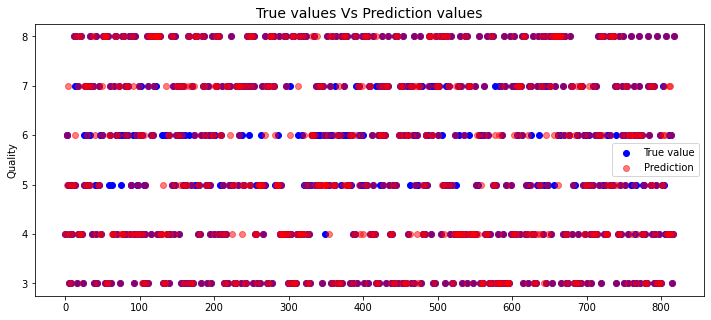

In [16]:
# Polynomial eq 
degree = 3
print("degree: ", degree)
 
poly = PolynomialFeatures(degree=degree,include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

pmodel = LogisticRegression(max_iter=100, random_state=42, multi_class="ovr", n_jobs=-1, verbose=1)
pmodel.fit(X_train, y_train)
print("Training metrics: ", pmodel.score(X_train, y_train))
print("Testing metrics: ", pmodel.score(X_test, y_test))
y_pred = pmodel.predict(X_test)
print("\n\n")
 
x_axis_values = [i for i in range(y_test.shape[0])]
 
plt.figure(figsize=(12, 5))
plt.title("True values Vs Prediction values", fontsize=14)
plt.scatter(x=x_axis_values, y=y_test, label="True value", color='b', alpha=1)
plt.scatter(x=x_axis_values, y=y_pred, label="Prediction", color='r', alpha=0.5)
plt.ylabel("Quality")
plt.legend() 
plt.show()